Epoch 1/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4861409046558233
  	- val_loss = 0.44165839199666623
  	- acc = 0.785649265234287
  	- val_acc = 0.7896173563268449
 


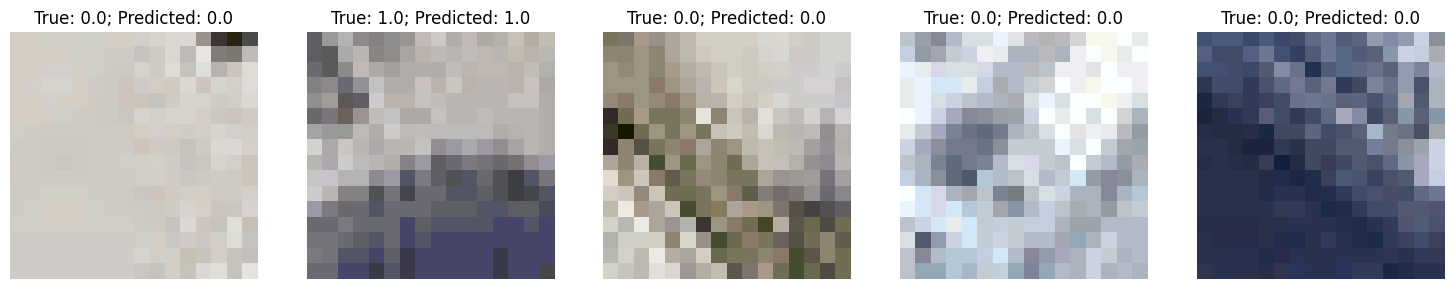

Epoch 2/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.45319677664683417
  	- val_loss = 0.43331720928351086
  	- acc = 0.7976444575419793
  	- val_acc = 0.8031087837837361
 


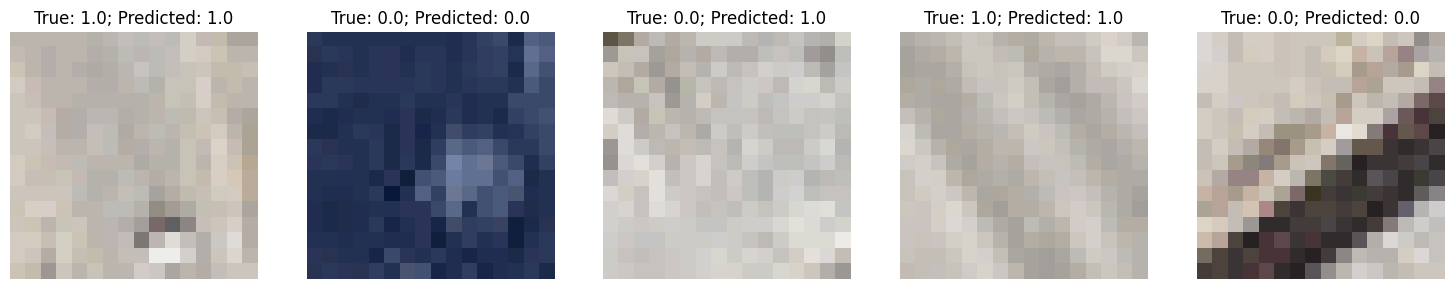

Epoch 3/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.44210445422392625
  	- val_loss = 0.4516439327487239
  	- acc = 0.800882619711069
  	- val_acc = 0.7839749952157339
 


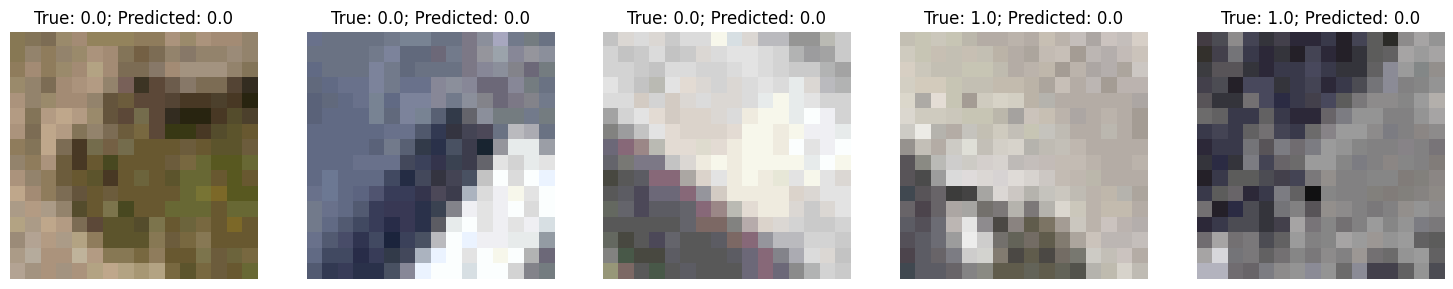

Epoch 4/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4342299920779008
  	- val_loss = 0.4376258789389222
  	- acc = 0.8025893504802998
  	- val_acc = 0.7866379861478452
 


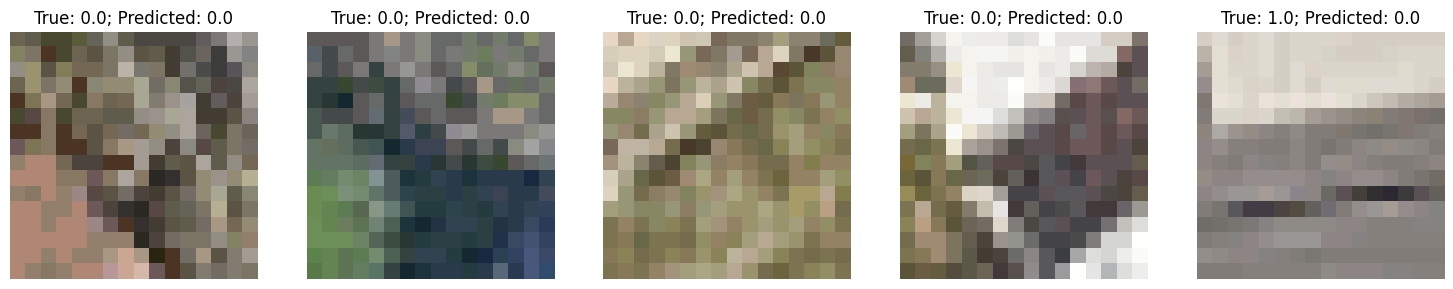

Epoch 5/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.42754919556471016
  	- val_loss = 0.4273478361191573
  	- acc = 0.807056422325281
  	- val_acc = 0.786927337999697
 


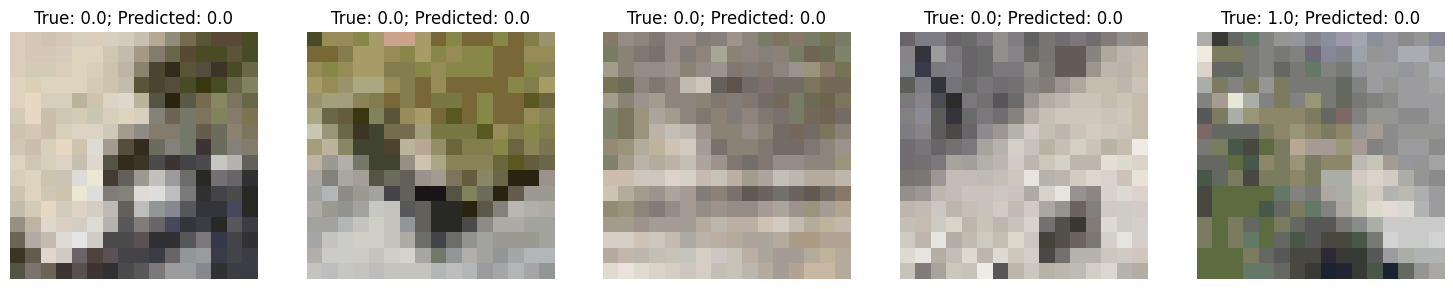

Epoch 6/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.423967271401332
  	- val_loss = 0.4554677362795229
  	- acc = 0.8086831004802997
  	- val_acc = 0.7613562654565882
 


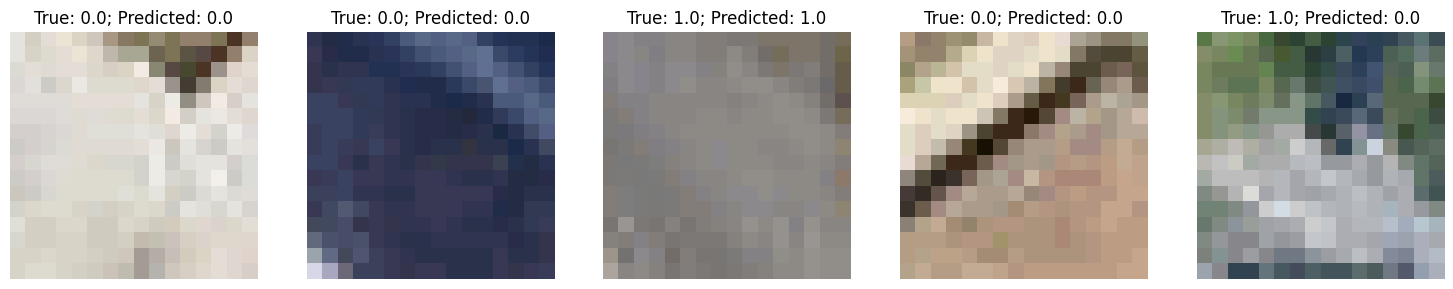

Epoch 7/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.41857565270020414
  	- val_loss = 0.431568357679579
  	- acc = 0.8107694575419793
  	- val_acc = 0.7842325501971774
 


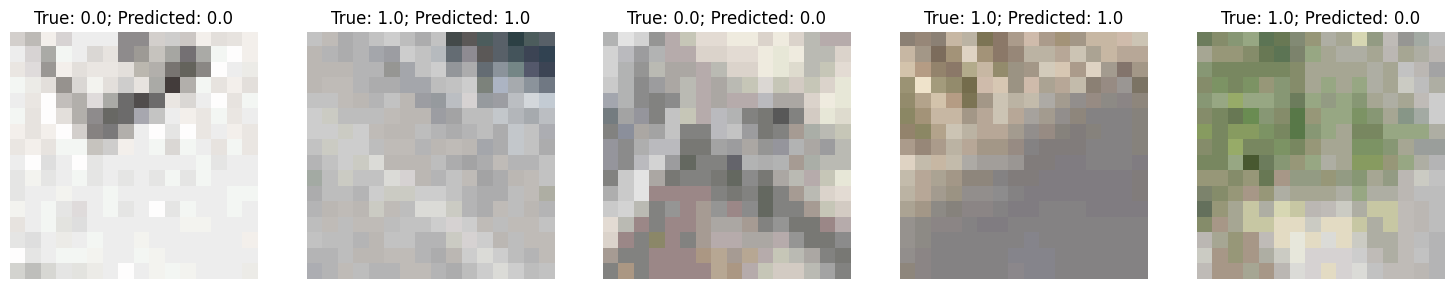

Epoch 8/20:   0%|          | 0/650 [00:00<?, ?it/s]

	- loss = 0.4167154252070647
  	- val_loss = 0.43736571239100563
  	- acc = 0.8106973421573639
  	- val_acc = 0.7716775415120302
 


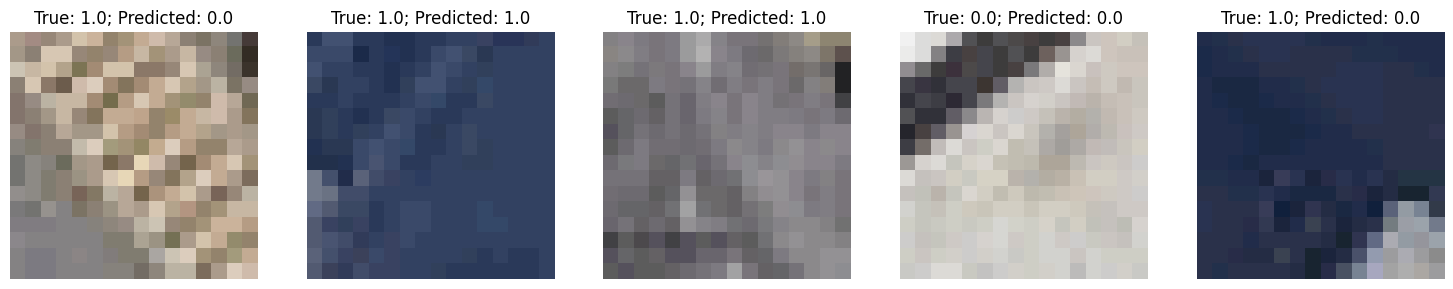

Epoch 9/20:   0%|          | 0/650 [00:00<?, ?it/s]

In [ ]:
import torch
from torch import nn
import patch_cnn
import image_dataset
import training_loop
from pathlib import Path

BASE_PATH = Path('..')


device = 'cuda' if torch.cuda.is_available() else 'cpu'  # automatically select device
train_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'training',
                                           device)
val_dataset = image_dataset.ImageDataset(BASE_PATH / 'data' / 'validation', device)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=True)
model = patch_cnn.PatchCNN().to(device)
loss_fn = nn.BCELoss()
metric_fns = {'acc': patch_cnn.accuracy_fn}
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 20
training_loop.train(train_dataloader, val_dataloader, model, loss_fn, metric_fns, optimizer, n_epochs)

In [ ]:
# predict on test set
test_path = BASE_PATH / 'data' / 'test' / 'images'
test_filenames = sorted(test_path.glob('*.png'))
test_images = load_all_from_path(test_path)
test_images = test_images[:, :, :, :3]
test_patches = np.moveaxis(image_to_patches(test_images), -1, 1)  # HWC to CHW
test_patches = np.reshape(test_patches, (25, -1, 3, PATCH_SIZE, PATCH_SIZE))  # split in batches for memory constraints
test_pred = [model(np_to_tensor(batch, device)).detach().cpu().numpy() for batch in test_patches]
test_pred = np.concatenate(test_pred, 0)
test_pred = np.round(test_pred.reshape(test_images.shape[0], test_images.shape[1] // PATCH_SIZE, test_images.shape[1] // PATCH_SIZE))